In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [3]:
model_2bit             = ['AlexNet-2b', 'VGG16-2b', 'ResNet18-2b', 'ResNet34-2b', 'VitBase-2b']
model_4bit             = ['AlexNet-4b', 'VGG16-4b', 'ResNet18-4b', 'ResNet34-4b', 'VitBase-4b']
model_8bit             = ['AlexNet-8b', 'VGG16-8b', 'ResNet18-8b', 'ResNet34-8b', 'VitBase-8b']

model_2bit             = ['2-bit', '2-bit','2-bit', '2-bit', '2-bit']
model_4bit             = ['4-bit', '4-bit','4-bit', '4-bit', '4-bit']
model_8bit             = ['8-bit', '8-bit','8-bit', '8-bit', '8-bit']

################ BRAMAC ################
# BRAMAC-1DA
speedup_2b_bramac_1da  = [1.45, 1.14, 1.00, 1.09, 1.20]
speedup_4b_bramac_1da  = [1.88, 1.43, 1.14, 1.32, 1.74]
speedup_8b_bramac_1da  = [1.75, 1.11, 1.01, 1.06, 1.73]

# BRAMAC-2SA
speedup_2b_bramac_2sa  = [1.86, 1.44, 1.17, 1.36, 1.70]
speedup_4b_bramac_2sa  = [2.51, 1.95, 1.49, 1.70, 1.95]
speedup_8b_bramac_2sa  = [2.23, 1.33, 1.18, 1.25, 1.92]


################ M4BRAM ################
# Double-Pumped M4BRAM-S
speedup_2b_m4bram_s_d  = [2.72, 1.85, 1.77, 2.26, 2.48]
speedup_4b_m4bram_s_d  = [2.70, 2.31, 2.38, 2.43, 2.51]
speedup_8b_m4bram_s_d  = [2.31, 1.61, 1.62, 1.64, 1.92]

# Synchronous M4BRAM-L
speedup_2b_m4bram_l_s  = [2.58, 2.03, 1.61, 1.69, 2.19]
speedup_4b_m4bram_l_s  = [2.93, 2.24, 2.28, 2.33, 2.37]
speedup_8b_m4bram_l_s  = [2.37, 1.80, 1.84, 1.89, 1.93]

In [5]:
index = 4
(speedup_2b_m4bram_l_s[index] + speedup_4b_m4bram_l_s[index] + speedup_8b_m4bram_l_s[index] + 
 speedup_2b_m4bram_s_d[index] + speedup_4b_m4bram_s_d[index] + speedup_8b_m4bram_s_d[index]) / \
(speedup_2b_bramac_2sa[index] + speedup_4b_bramac_2sa[index] + speedup_8b_bramac_2sa[index] + 
 speedup_2b_bramac_1da[index] + speedup_4b_bramac_1da[index] + speedup_8b_bramac_1da[index] )

1.30859375

In [3]:
model_list          = model_2bit + model_4bit + model_8bit

speedup_m4bram_s_d  = speedup_2b_m4bram_s_d + speedup_4b_m4bram_s_d + speedup_8b_m4bram_s_d
speedup_m4bram_l_s  = speedup_2b_m4bram_l_s + speedup_4b_m4bram_l_s + speedup_8b_m4bram_l_s

speedup_bramac_1da  = speedup_2b_bramac_1da + speedup_4b_bramac_1da + speedup_8b_bramac_1da
speedup_bramac_2sa  = speedup_2b_bramac_2sa + speedup_4b_bramac_2sa + speedup_8b_bramac_2sa

speedup_mean_m4bram_s_d = sum(speedup_m4bram_s_d) / len(speedup_m4bram_s_d)
speedup_mean_m4bram_l_s = sum(speedup_m4bram_l_s) / len(speedup_m4bram_l_s)
speedup_mean_bramac_1da = sum(speedup_bramac_1da) / len(speedup_bramac_1da)
speedup_mean_bramac_2sa = sum(speedup_bramac_2sa) / len(speedup_bramac_2sa)

order               = [0,5,10, 1,6,11, 2,7,12, 3,8,13, 4,9,14]
model_list          = [model_list[i] for i in order] + ['GM']
speedup_m4bram_s_d  = [speedup_m4bram_s_d[i] for i in order] + [speedup_mean_m4bram_s_d]
speedup_m4bram_l_s  = [speedup_m4bram_l_s[i] for i in order] + [speedup_mean_m4bram_l_s]
speedup_bramac_1da  = [speedup_bramac_1da[i] for i in order] + [speedup_mean_bramac_1da]
speedup_bramac_2sa  = [speedup_bramac_2sa[i] for i in order] + [speedup_mean_bramac_2sa]

In [4]:
print(speedup_bramac_1da[-1], speedup_bramac_2sa[-1], speedup_m4bram_s_d[-1], speedup_m4bram_l_s[-1], )

1.4 1.6766666666666665 2.1606666666666663 2.1273333333333335


## Improvement over Baseline DLA

In [12]:
linestyle   = 'solid'
markersize  = 6
alpha       = 1
tick_size   = 14.5
label_size  = 15
legend_size = 14.5
title_size  = 15
rotation    = 0

title_yloc  = -0.26

figwidth    = 16
figheight   = 3

# bar setting
width      = 0.028  # the width of each bar
edgewidth  = 0.8 # the edge width of each bar
hatchwidth = 0.5 # the edge width of each bar
spacing    = 0.18 # spacing between each model bar
distance   = 0.016 # spacing between every two bars of the same model
x          = np.arange(len(model_list))*spacing # the label locations

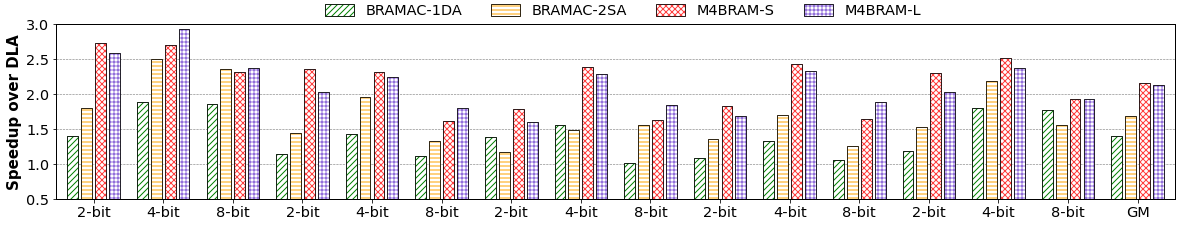

In [25]:
f, ax = plt.subplots(1, 1)
f.set_figwidth(figwidth)
f.set_figheight(figheight)
f.tight_layout(pad=1)

yaxis_lim = [0.5, 3.001, 0.5]

f1 = ax.bar(x - width*1.5 - distance, speedup_bramac_1da, width, label=model_list,  
               color='white', edgecolor='green', linewidth=hatchwidth, hatch="////")
f2 = ax.bar(x - width*1.5 - distance, speedup_bramac_1da, width, label=model_list, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f3 = ax.bar(x - width*0.5 - distance*0.5, speedup_bramac_2sa, width, label=model_list,  
               color='white', edgecolor='orange', linewidth=hatchwidth, hatch="---")
f4 = ax.bar(x - width*0.5 - distance*0.5, speedup_bramac_2sa, width, label=model_list, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f5 = ax.bar(x + width*0.5 + distance*0, speedup_m4bram_s_d, width, label=model_list,  
               color='white', edgecolor=(1,0.25,0.25), linewidth=hatchwidth, hatch="xxxx")
f6 = ax.bar(x + width*0.5 + distance*0, speedup_m4bram_s_d, width, label=model_list, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

f7 = ax.bar(x + width*1.5 + distance*0.5, speedup_m4bram_l_s, width, label=model_list,  
               color='white', edgecolor='mediumpurple', linewidth=hatchwidth, hatch="+++")
f8 = ax.bar(x + width*1.5 + distance*0.5, speedup_m4bram_l_s, width, label=model_list, 
               color='none', edgecolor='black', linewidth=edgewidth, alpha=alpha)

ax.set_xticks(x-distance*0.25,)
ax.set_xticklabels(model_list)

ax.set_ylim(yaxis_lim[:2])
ax.set_yticks(np.arange(yaxis_lim[0], yaxis_lim[1], yaxis_lim[2]))
ax.set_ylabel('Speedup over DLA', fontsize=label_size, weight='bold')
ax.set_yticklabels(np.round(ax.get_yticks(), 1))

ax.tick_params(axis='both', which='major', labelsize=tick_size)

ax.grid(True, linestyle='dashed', axis='y', zorder=0, color='gray', linewidth=0.6)
ax.set_axisbelow(True)
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1)  # change width

#ax.set_title('(a) 2-bit Weight & Activation', y=title_yloc, fontsize=title_size, weight='bold')

ax.margins(x=0.01)

legend_loc  = (0.27, 0.895)
f.legend([(f1,f2), (f3,f4), (f5,f6), (f7,f8)], ['BRAMAC-1DA', 'BRAMAC-2SA', 'M4BRAM-S', 'M4BRAM-L'], 
             loc=legend_loc, fontsize=legend_size, ncol=4, columnspacing=2, frameon=False, handlelength=2, handleheight=0.9)


f.subplots_adjust(
    left=0.01,
    right=0.981,
)
f.savefig('fig10_m4bram_vs_bramac.svg', transparent=True, bbox_inches = 'tight', format='svg', dpi=200, pad_inches=0.1)